In [1]:
# ! pip install -U pip setuptools wheel
# ! pip install spacy==3.7.5
# ! python -m spacy download en_core_web_sm

# !pip install scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_jnlpba_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz
# !pip install gensim
# !pip install transformers

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas import read_csv
from wordcloud import WordCloud
import spacy
pd.set_option('display.max_rows', None)

In [3]:
# Load all required data files: DEMO data
patients = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\PATIENTS.csv")
admissions = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\ADMISSIONS.csv")
prescriptions = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\PRESCRIPTIONS.csv")
microbiologyevents = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\MICROBIOLOGYEVENTS.csv")
diagnoses_icd = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\DIAGNOSES_ICD.csv")

In [4]:
noteevents = pd.read_csv("C:\\Users\\harsh\\Desktop\\HBK008\\Holland Bloorview\\projects\\AI4H_UT\\full_dataset\\NOTEEVENTS.csv.gz")

In [5]:
noteevents.head()

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     175       13702  107527.0  2118-06-14       NaN       NaN   
2     176       13702  167118.0  2119-05-25       NaN       NaN   
3     177       13702  196489.0  2124-08-18       NaN       NaN   
4     178       26880  135453.0  2162-03-25       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2151-7-16**]       Dischar...  
1  Admission Date:  [**2118-6-2**]       Discharg...  
2  Admission Date:  [**2119-5-4**]              D...  
3  Admission Date:  [**2124-7-21**]              ...  
4  Admission Date:  [**2162-3-3**]              D...

In [6]:
noteevents_cols  = list(noteevents.columns)
noteevents_cols

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'CHARTDATE',
 'CHARTTIME',
 'STORETIME',
 'CATEGORY',
 'DESCRIPTION',
 'CGID',
 'ISERROR',
 'TEXT']

In [7]:
noteevents.shape

(2083180, 11)

In [9]:
diagnoses_icd.info()
diagnoses_icd.iloc[0]
print(diagnoses_icd.iloc[0])
print(diagnoses_icd.columns)

print(len(diagnoses_icd))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB
ROW_ID          1297
SUBJECT_ID       109
HADM_ID       172335
SEQ_NUM          1.0
ICD9_CODE      40301
Name: 0, dtype: object
Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')
651047


In [11]:
subarr=diagnoses_icd[diagnoses_icd['ICD9_CODE']=='E8881']['SUBJECT_ID'].to_numpy()
print(len(subarr))


arr_subject_id=[]
arr_hadm_id=[]
for row in range(0, len(diagnoses_icd)):
  if(diagnoses_icd.loc[row, 'ICD9_CODE']=='E8881'):
    arr_subject_id.append(diagnoses_icd.loc[row, 'SUBJECT_ID'])

    # print(diagnoses_icd_df.loc[row, 'SUBJECT_ID'])
print('length of array is:',len(arr_subject_id))

74
length of array is: 74


In [12]:
icd9_E8881_patients_discharge_summary_df = pd.DataFrame(columns=['SUBJECT_ID', 'CATEGORY', 'TEXT'])
patients_dict = {"SUBJECT_ID":[],"CATEGORY":[],"TEXT":[]};

In [15]:
for i in range(0, len(noteevents)):
  if((noteevents.loc[i, 'SUBJECT_ID'] in arr_subject_id) and (noteevents.loc[i, 'CATEGORY'] == 'Nutrition')):
   patients_dict["SUBJECT_ID"].append(noteevents.loc[i, 'SUBJECT_ID'])
   patients_dict["CATEGORY"].append(noteevents.loc[i, 'CATEGORY'])
   patients_dict["TEXT"].append(noteevents.loc[i, 'TEXT'])

In [16]:
patients_df = pd.DataFrame(patients_dict)
patients_df.shape

(22, 3)

In [17]:
print(patients_df.iloc[0]['TEXT'])

Patient transferred to MICU for concern for aspiration.  Diet changed
   to NPO; NGT in for medication.  Noted plan to transition to comfort
   focused care.
   Will sign off at this time.  Please consult if needed. Pager *[**Numeric Identifier 5307**]



In [18]:
import os
path = r'C:\Users\harsh\Desktop\HBK008\Holland Bloorview\projects\AI4H_UT'
patients_df.to_csv(os.path.join(path, r'ICD9-E8881_Patients_NutritionNotes.csv'), index=False)

In [22]:
nlp = spacy.load('en_core_web_sm')
notes = []
with open('ICD9-E8881_Patients_NutritionNotes.csv', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['SUBJECT_ID,CATEGORY,TEXT\n', '17610,Nutrition,"Patient transferred to MICU for concern for aspiration.  Diet changed\n', '   to NPO; NGT in for medication.  Noted plan to transition to comfort\n', '   focused care.\n', '   Will sign off at this time.  Please consult if needed. Pager *[**Numeric Identifier 5307**]\n', '"\n', '40493,Nutrition,"Objective\n', '   Pertinent medications: RISS, SS lytes, thiamin, folate, lasix, bowel\n', '   regimen, MOM, reglan, others noted\n', '   Labs:\n', '   Value\n', '   Date\n', '   Glucose\n', '   93 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Glucose Finger Stick\n', '   120\n', '   [**2172-11-9**] 08:57 AM\n', '   BUN\n', '   15 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Creatinine\n', '   0.6 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Sodium\n', '   137 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   Potassium\n', '   3.9 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   Chloride\n', '   106 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   

In [23]:
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  print(doc[-1])
  print('*************************************************************************************************************')

SUBJECT_ID,CATEGORY,TEXT

*************************************************************************************************************
17610,Nutrition,"Patient transferred to MICU for concern for aspiration.  Diet changed

*************************************************************************************************************
   to NPO; NGT in for medication.  Noted plan to transition to comfort

*************************************************************************************************************
   focused care.

*************************************************************************************************************
   Will sign off at this time.  Please consult if needed. Pager *[**Numeric Identifier 5307**]

*************************************************************************************************************
"

*************************************************************************************************************
40493,Nutrition,"Objective

*********

In [24]:
# Token
token_without_punct = []
for i in range(len(doc)):
  token_without_punct.append([token.orth_ for token in doc[i] if not token.is_punct | token.is_space])
  print(token_without_punct[-1])
  print('*******************************************************************************************')

['SUBJECT_ID', 'CATEGORY', 'TEXT']
*******************************************************************************************
['17610,Nutrition,"Patient', 'transferred', 'to', 'MICU', 'for', 'concern', 'for', 'aspiration', 'Diet', 'changed']
*******************************************************************************************
['to', 'NPO', 'NGT', 'in', 'for', 'medication', 'Noted', 'plan', 'to', 'transition', 'to', 'comfort']
*******************************************************************************************
['focused', 'care']
*******************************************************************************************
['Will', 'sign', 'off', 'at', 'this', 'time', 'Please', 'consult', 'if', 'needed', 'Pager', 'Numeric', 'Identifier', '5307']
*******************************************************************************************
[]
*******************************************************************************************
['40493,Nutrition,"Objective']
****************

In [25]:
df=notes

In [26]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['SUBJECT_ID', 'CATEGORY', 'TEXT\n'], ['17610,Nutrition,"Patient', 'MICU', 'Diet'], ['NPO', 'NGT'], [], ['Identifier 5307'], [], ['40493,Nutrition,"Objective'], ['SS'], [], [], [], [], [], [], ['2172-11-9', '01:50 AM\n'], ['Stick'], ['120'], ['2172-11-9'], ['BUN'], [], ['2172-11-9', '01:50 AM\n'], [], [], ['2172-11-9', '01:50 AM\n'], [], ['137 mEq'], ['2172-11-9', '01:50 AM\n'], [], ['3.9 mEq'], ['2172-11-9', '01:50 AM\n'], [], [], ['2172-11-9', '01:50 AM\n'], [], [], ['2172-11-9', '01:50 AM\n'], ['PO2'], ['66 mm'], ['2172-11-9'], [], ['41 mm'], ['2172-11-9'], [], ['7.42'], ['2172-11-9'], [], ['5.0'], ['2172-11-1', '06:06 PM'], ['Calc'], [], ['2172-11-9'], [], [], ['2172-11-3', '02:24 AM'], [], [], ['2172-11-9', '01:50 AM\n'], [], [], ['2172-11-9', '01:50 AM\n'], ['Ionized Calcium\n'], ['1.11'], ['2172-11-5', '01:34 PM'], [], ['2.2'], ['2172-11-9', '01:50 AM\n'], ['1728'], [], ['Abd soft/+bs\n'], [], [], ['earlier today', 'TF'], [], ['100%'], [], [], [], ['SLP-', 'NGT', 'TF'], [], ['I

In [27]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)

In [29]:
model1.wv['Hematocrit']

array([-2.3748518e-04,  4.2191767e-03,  2.1141458e-03,  9.9958219e-03,
        6.2948110e-04, -5.4644262e-03, -1.1796928e-03,  2.0705319e-03,
       -3.3730685e-03, -7.8467671e-03, -5.5992617e-03, -6.7500677e-03,
        6.3533271e-03,  3.9225565e-03,  8.2155354e-03,  6.5196683e-03,
       -6.1278404e-03,  2.7159513e-03,  8.4721260e-03,  1.5956569e-03,
        3.0682290e-03,  5.8126138e-03, -8.8393716e-03,  9.1247475e-03,
        6.8194829e-03,  8.5104434e-03, -8.2262624e-03,  6.1755395e-03,
        6.6290712e-03, -1.3576425e-03, -6.2938654e-03,  5.3266799e-03,
       -6.8595777e-03, -5.3233542e-03,  3.5116898e-03,  8.0809724e-03,
        8.6926939e-03, -4.4053150e-03, -9.1887703e-03,  9.6076941e-03,
        6.2903082e-03, -3.9663352e-03, -8.4597291e-03, -4.7183349e-03,
       -3.9572273e-03, -3.2734512e-03,  8.1909180e-04, -2.9716254e-04,
       -3.1123769e-03, -5.9959874e-03,  9.4205197e-03, -4.7255373e-03,
       -7.2620986e-03,  7.6847305e-03,  2.5176955e-03,  8.6263958e-03,
      

In [30]:
model1.wv.similar_by_word('Hematocrit')

[('10.4', 0.3077991008758545),
 ('65 kg', 0.26820874214172363),
 ('100 ml', 0.2433023303747177),
 ('151', 0.23261547088623047),
 ('Diet', 0.22584640979766846),
 ('60', 0.224870964884758),
 ('38 mm', 0.22341559827327728),
 ('10.3', 0.21017244458198547),
 ('Goal', 0.2089768797159195),
 ('07:16 AM\n', 0.20850542187690735)]

In [31]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

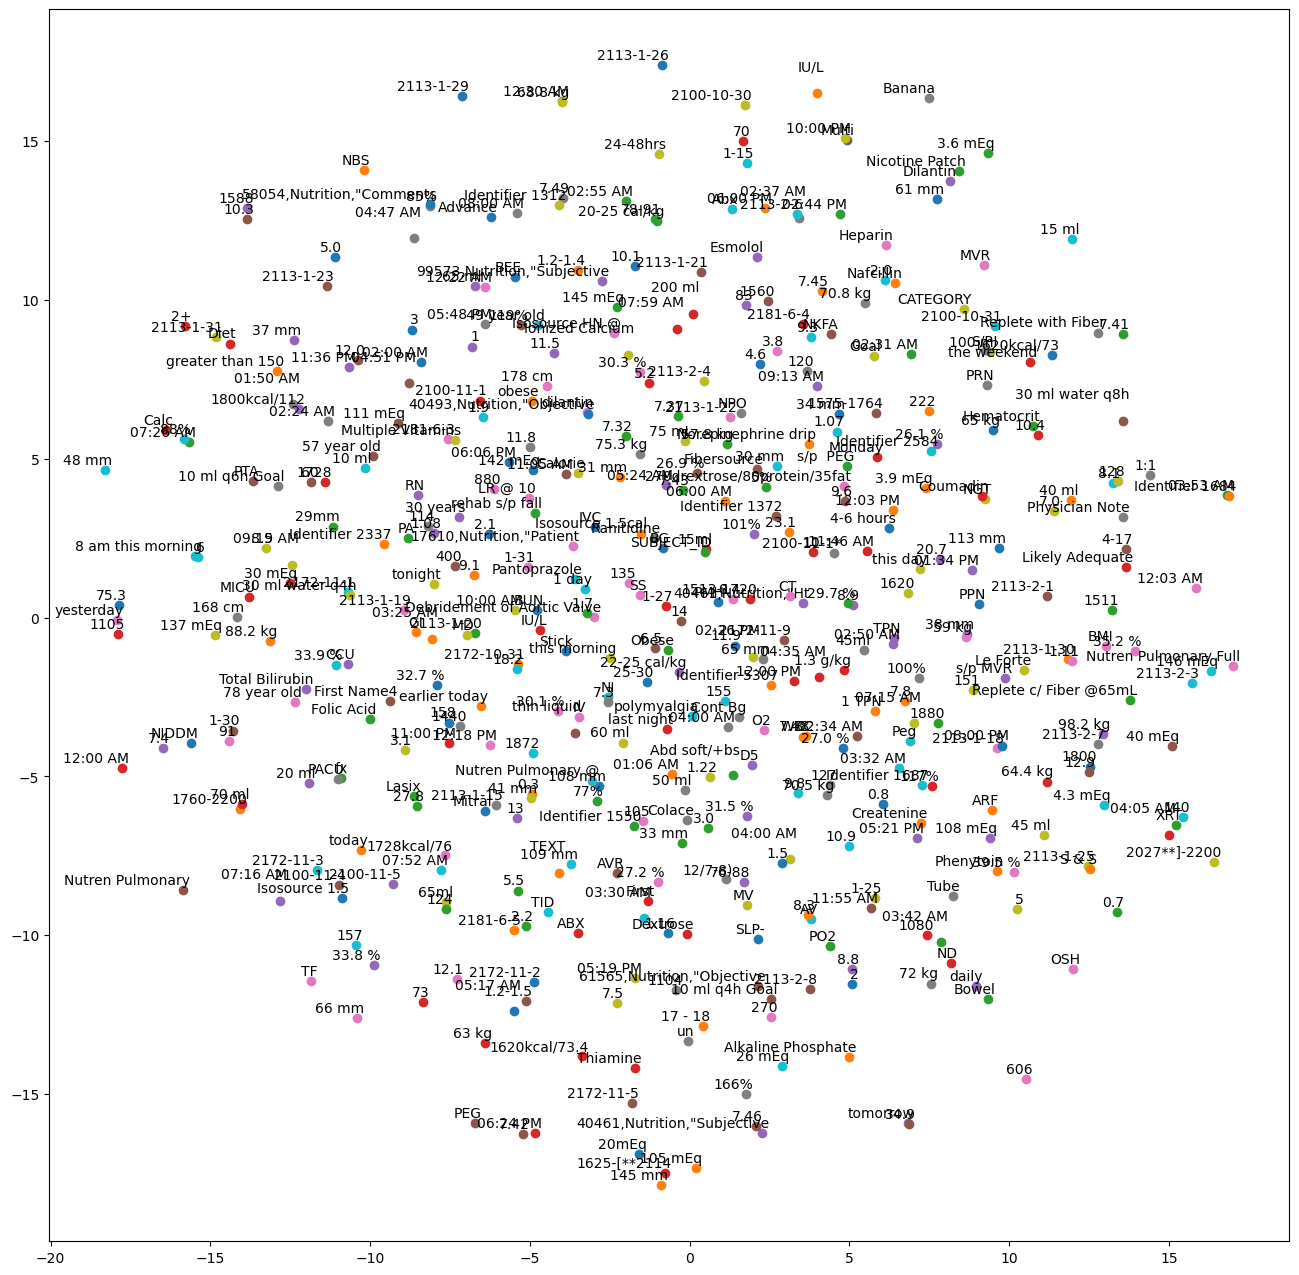

In [33]:
from sklearn.manifold import TSNE
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

In [34]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

[=================---------------------------------] 35.5% 23.4/66.0MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.8% 59.2/66.0MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [36]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

2172-11-2
2113-1-30
2113-1-20
2100-11-1
05:21 PM
2113-1-21
2113-1-22
02:37 AM

2113-1-25
2113-2-3
05:17 AM

03:25 AM

PO2
Calc
05:24 AM
2113-2-1
12:18 PM
04:47 AM

2113-1-31
2113-2-6
BUN
WBC
Hematocrit
04:05 AM

2100-11-5
2172-11-9
BMI
2113-2-7
2113-2-4
03:30 AM

Stick
Alkaline Phosphate
03:42 AM

Total Bilirubin
2113-2-8
TF
NPO
Ionized Calcium

49 year old
2172-10-31
02:55 AM
63 kg
40461,Nutrition,"Subjective
11:55 AM
178 cm
01:50 AM

04:00 AM

03:32 AM
GI
33 mm
2181-6-4
02:50 AM
04:51 PM

CT
2113-1-15
NGT
48 mm
IU/L

04:35 AM

11:36 PM
08:00 AM
MD
01:06 AM
200 ml

PEG
65 mm
137 mEq
30 mm
PMH
2181-6-5
IU/L
07:16 AM

111 mEq
IV
04:00 AM
09:19 AM

2100-10-31
Advance
07:26 AM
11:46 AM
2100-11-4
2113-1-18
45ml
BEE
1.2-1.4
03:53 AM
Thiamine
s/p MVR
Nutren Pulmonary
12:22 AM
75.3 kg
this morning
26 mEq
Bowel
61565,Nutrition,"Objective
10 ml
142 mEq
3.9 mEq
65 ml
Identifier 1372
12:03 AM
168 cm
41 mm
2172-11-1
06:06 PM
Nafcillin
02:31 AM
1.3 g/kg
05:19 PM
07:52 AM
08:00 PM
40 ml
Identifier 1

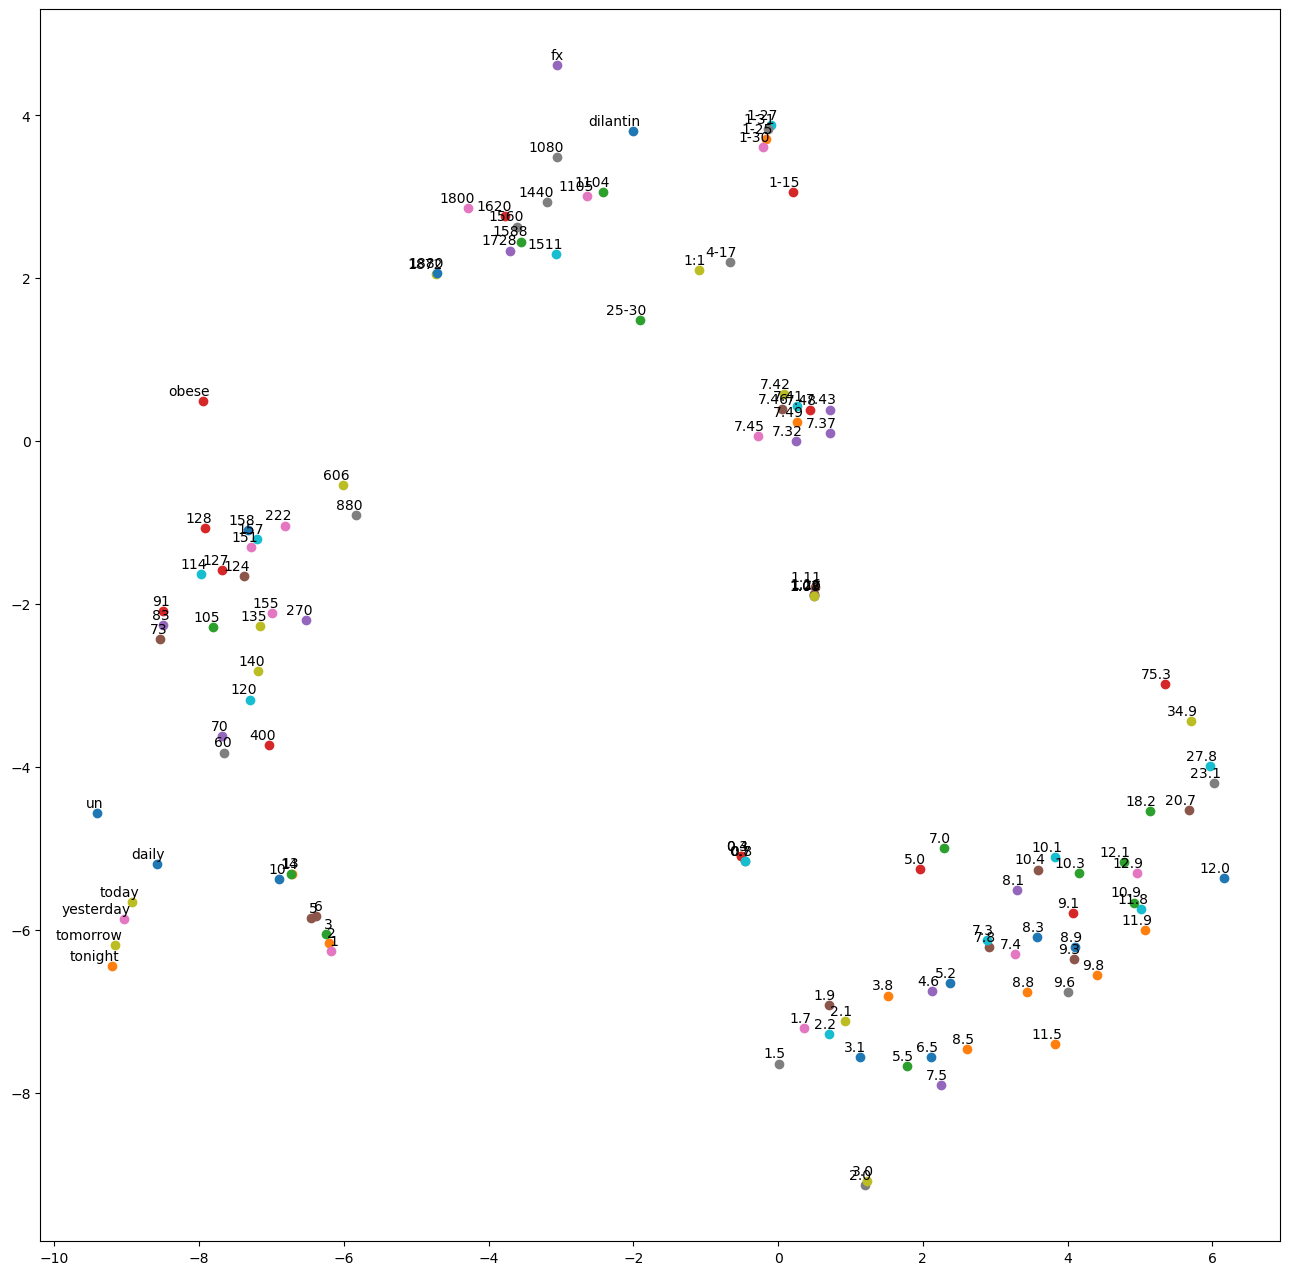

In [37]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

In [38]:
# Entity Visualizer
from spacy import displacy
for i in range(len(doc)):
  displacy.render(doc[i], style="ent", jupyter=True)
  print('*********************************************************************************************************************************************************************')

*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


*********************************************************************************************************************************************************************


# Analysis with SciSpacy

In [39]:
import scispacy
import spacy

In [40]:
# nlp = spacy.load('en_core_web_sm')
notes = []
with open('ICD9-E8881_Patients_NutritionNotes.csv', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['SUBJECT_ID,CATEGORY,TEXT\n', '17610,Nutrition,"Patient transferred to MICU for concern for aspiration.  Diet changed\n', '   to NPO; NGT in for medication.  Noted plan to transition to comfort\n', '   focused care.\n', '   Will sign off at this time.  Please consult if needed. Pager *[**Numeric Identifier 5307**]\n', '"\n', '40493,Nutrition,"Objective\n', '   Pertinent medications: RISS, SS lytes, thiamin, folate, lasix, bowel\n', '   regimen, MOM, reglan, others noted\n', '   Labs:\n', '   Value\n', '   Date\n', '   Glucose\n', '   93 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Glucose Finger Stick\n', '   120\n', '   [**2172-11-9**] 08:57 AM\n', '   BUN\n', '   15 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Creatinine\n', '   0.6 mg/dL\n', '   [**2172-11-9**] 01:50 AM\n', '   Sodium\n', '   137 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   Potassium\n', '   3.9 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   Chloride\n', '   106 mEq/L\n', '   [**2172-11-9**] 01:50 AM\n', '   

In [41]:
for i in range(len(notes)):
  print(notes[i])
  print("*************************************************************************************")

SUBJECT_ID,CATEGORY,TEXT

*************************************************************************************
17610,Nutrition,"Patient transferred to MICU for concern for aspiration.  Diet changed

*************************************************************************************
   to NPO; NGT in for medication.  Noted plan to transition to comfort

*************************************************************************************
   focused care.

*************************************************************************************
   Will sign off at this time.  Please consult if needed. Pager *[**Numeric Identifier 5307**]

*************************************************************************************
"

*************************************************************************************
40493,Nutrition,"Objective

*************************************************************************************
   Pertinent medications: RISS, SS lytes, thiamin, folate, lasix, b

In [42]:
import en_core_sci_md
nlp = en_core_sci_md.load()

In [43]:
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  for ent in doc[-1].ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
  print("****************************************************************************************************")

SUBJECT_ID 0 10 ENTITY
CATEGORY 11 19 ENTITY
****************************************************************************************************
MICU 40 44 ENTITY
aspiration 61 71 ENTITY
Diet 74 78 ENTITY
****************************************************************************************************
NPO 6 9 ENTITY
NGT 11 14 ENTITY
medication 22 32 ENTITY
Noted 35 40 ENTITY
transition 49 59 ENTITY
comfort 63 70 ENTITY
****************************************************************************************************
focused care 3 15 ENTITY
****************************************************************************************************
Will sign 3 12 ENTITY
time 25 29 ENTITY
consult 39 46 ENTITY
****************************************************************************************************
****************************************************************************************************
***********************************************************************************

In [44]:
# Entity Visualizer
from spacy import displacy
for i in range(len(doc)):
  displacy.render(doc[i], style="ent", jupyter=True)
  print("************************************************************************************************************************************************")

************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


************************************************************************************************************************************************


In [45]:
df=notes

In [46]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['SUBJECT_ID', 'CATEGORY'], ['MICU', 'aspiration', 'Diet'], ['NPO', 'NGT', 'medication', 'Noted', 'transition', 'comfort'], ['focused care'], ['Will sign', 'time', 'consult'], [], [], ['medications', 'RISS', 'SS', 'lytes', 'thiamin', 'folate', 'lasix', 'bowel'], ['regimen', 'MOM', 'reglan'], ['Labs'], ['Value'], [], ['Glucose'], [], ['AM'], ['Glucose Finger'], [], ['AM'], ['BUN'], [], ['AM'], ['Creatinine'], [], ['AM'], ['Sodium'], [], ['AM'], ['Potassium'], [], ['AM'], ['Chloride'], [], ['AM'], ['TCO2'], [], ['AM'], ['PO2', 'arterial'], [], ['AM'], ['PCO2', 'arterial'], [], ['AM'], ['pH', 'arterial'], [], ['AM'], ['pH', 'urine'], [], ['PM'], ['CO2', 'Calc'], [], ['AM'], ['Albumin'], [], ['AM'], ['Calcium', 'non-ionized'], [], ['AM'], ['Phosphorus'], [], ['AM'], ['Ionized Calcium'], [], ['PM'], ['Magnesium'], [], ['AM'], ['Current diet', 'nutrition support', 'Fibersource', 'HN@60mL/hr'], ['infusing'], ['GI', 'soft/+bs'], ['Assessment', 'Nutritional Status'], ['Specifics'], ['Pt', 'ext

In [47]:
import gensim

In [48]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
model2 = word2vec.Word2Vec(corpus, min_count=1)

In [50]:
model2.wv['arterial']

array([ 0.00013019,  0.003344  , -0.00708544, -0.00159427,  0.0081028 ,
        0.00709473, -0.00361546,  0.00286618, -0.00868333,  0.00618364,
       -0.00490692, -0.00322038,  0.00950667,  0.00046824,  0.00780402,
       -0.00637494,  0.00521521,  0.00974663, -0.00869079, -0.00548494,
       -0.00707419, -0.00477135, -0.00354835, -0.00861325,  0.0077392 ,
       -0.00470258,  0.00814598,  0.00517979, -0.00698033,  0.00417376,
        0.00571336, -0.00746173, -0.00746034, -0.00247982, -0.00873334,
       -0.00131061, -0.00040421,  0.0033197 ,  0.00115664, -0.00137005,
       -0.00573323,  0.00178918, -0.00099749,  0.00666213,  0.00421187,
        0.00455798,  0.00141395, -0.00275581, -0.00444963, -0.00110244,
        0.00148484, -0.00316248, -0.00694154, -0.00804633, -0.00956423,
       -0.00594124, -0.00204597, -0.00417715, -0.00704359, -0.00347067,
        0.00436875, -0.00379218,  0.00851057,  0.00131818, -0.00782046,
        0.00945757,  0.00792965,  0.00580111, -0.00718854,  0.00

In [51]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

Skipping 'AM' as it is not present in the model's vocabulary.
Skipping 'PM' as it is not present in the model's vocabulary.
Skipping 'arterial' as it is not present in the model's vocabulary.
Skipping 'venous' as it is not present in the model's vocabulary.
Skipping 'pH' as it is not present in the model's vocabulary.
Skipping 'patient' as it is not present in the model's vocabulary.
Skipping 'PCO2' as it is not present in the model's vocabulary.
Skipping 'CO2' as it is not present in the model's vocabulary.
Skipping 'nutrition support' as it is not present in the model's vocabulary.
Skipping 'intake' as it is not present in the model's vocabulary.
Skipping 'Patient' as it is not present in the model's vocabulary.
Skipping 'Recommend' as it is not present in the model's vocabulary.
Skipping 'Potassium' as it is not present in the model's vocabulary.
Skipping 'Chloride' as it is not present in the model's vocabulary.
Skipping 'TCO2' as it is not present in the model's vocabulary.
Skippi

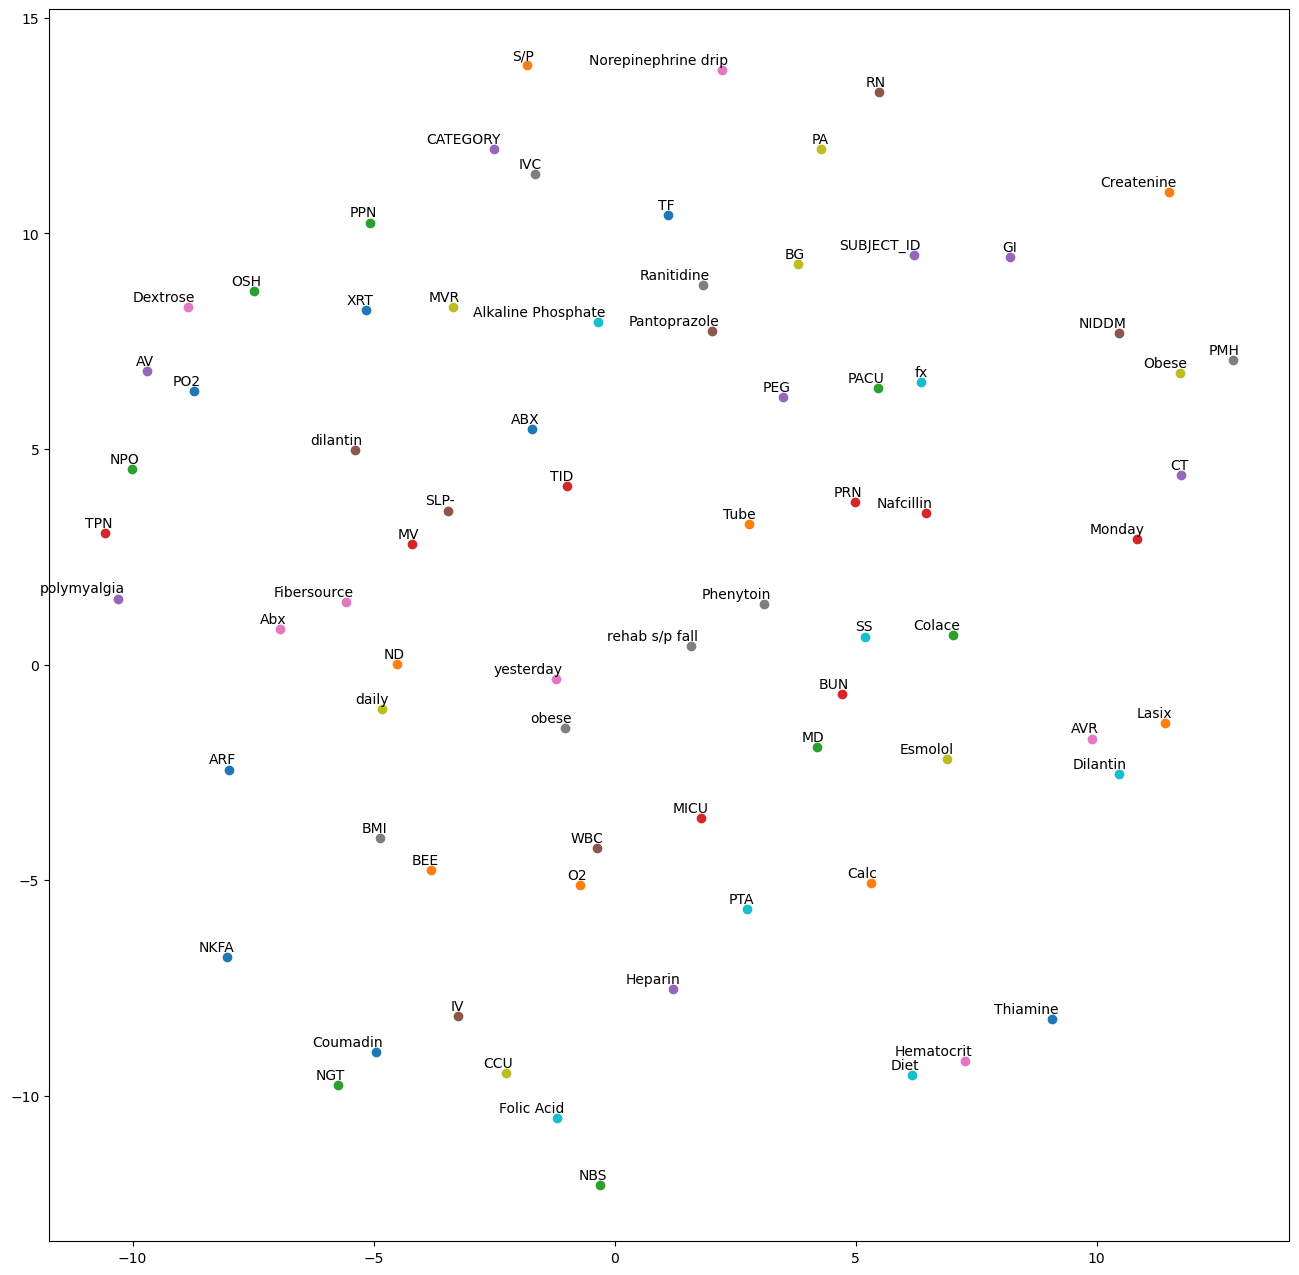

In [52]:
vocabs = model2.wv.index_to_key  # Access vocabulary using index_to_key
new_v = np.array(list(vocabs))
tsne_plot(model1, new_v)

In [53]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

In [54]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957463502883911),
 ('fatigue', 0.8547418117523193),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088536262512207),
 ('nausea', 0.8022516369819641),
 ('discomfort', 0.789000391960144),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692658305168152),
 ('symptom', 0.7564830183982849),
 ('migraine', 0.7536172866821289)]

In [55]:
new_corpus_in_pretrained_model = []
for word in new_v:
    if word in pretrained_model.key_to_index:
        new_corpus_in_pretrained_model.append(word)
    else:
        print(word)  # Print out-of-vocabulary words


AM
PM
pH
PCO2
PO2
Calc
CO2
nutrition support
Patient
Recommend
NPO
Potassium
Chloride
TCO2
Creatinine
BUN
Sodium
Glucose
non-ionized
Phosphorus
Magnesium
Current diet
GI
Assessment
Nutritional Status
Medical Nutrition Therapy
Calcium
Plan
Estimation
Labs
Value
WBC
Hematocrit
Hgb
K/uL

Albumin
Admit weight
BMI
Usual body weight
Ideal body weight
Glucose Finger
Height
Weight change
Daily weight
Objective
Total
Specifics
Inadequate
Check chemistry
AST
ALT
Alkaline Phosphate
Bilirubin
Ionized Calcium
Pt
TF
Tube
Replete
NGT
Food allergies
Protein
Fluid
Estimated Nutritional Needs
Triglyceride
Amylase
tube feed
Adjusted
Diagnosis
Calories
RISS
Goal rate
Residual Check
SLP
TPN
PEG
RN
Name8
Fibersource
PMH
HN
KCl
Soft
MVR
Non-tender
Diet
mitral regurgitation [**3
repletion
Noted
bowel sounds
lytes
flail leaflet
Thiamine
hypocaloric diet
Multivitamins
Bowel sounds
Abdominal
Milrinone
Advance rate
extubate
Mineral supplement
Multivitamin
BEE
Flush
FoLIC Acid
Patient transferred
regular diet
Nutr

In [56]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model:
            tokens.append(model[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

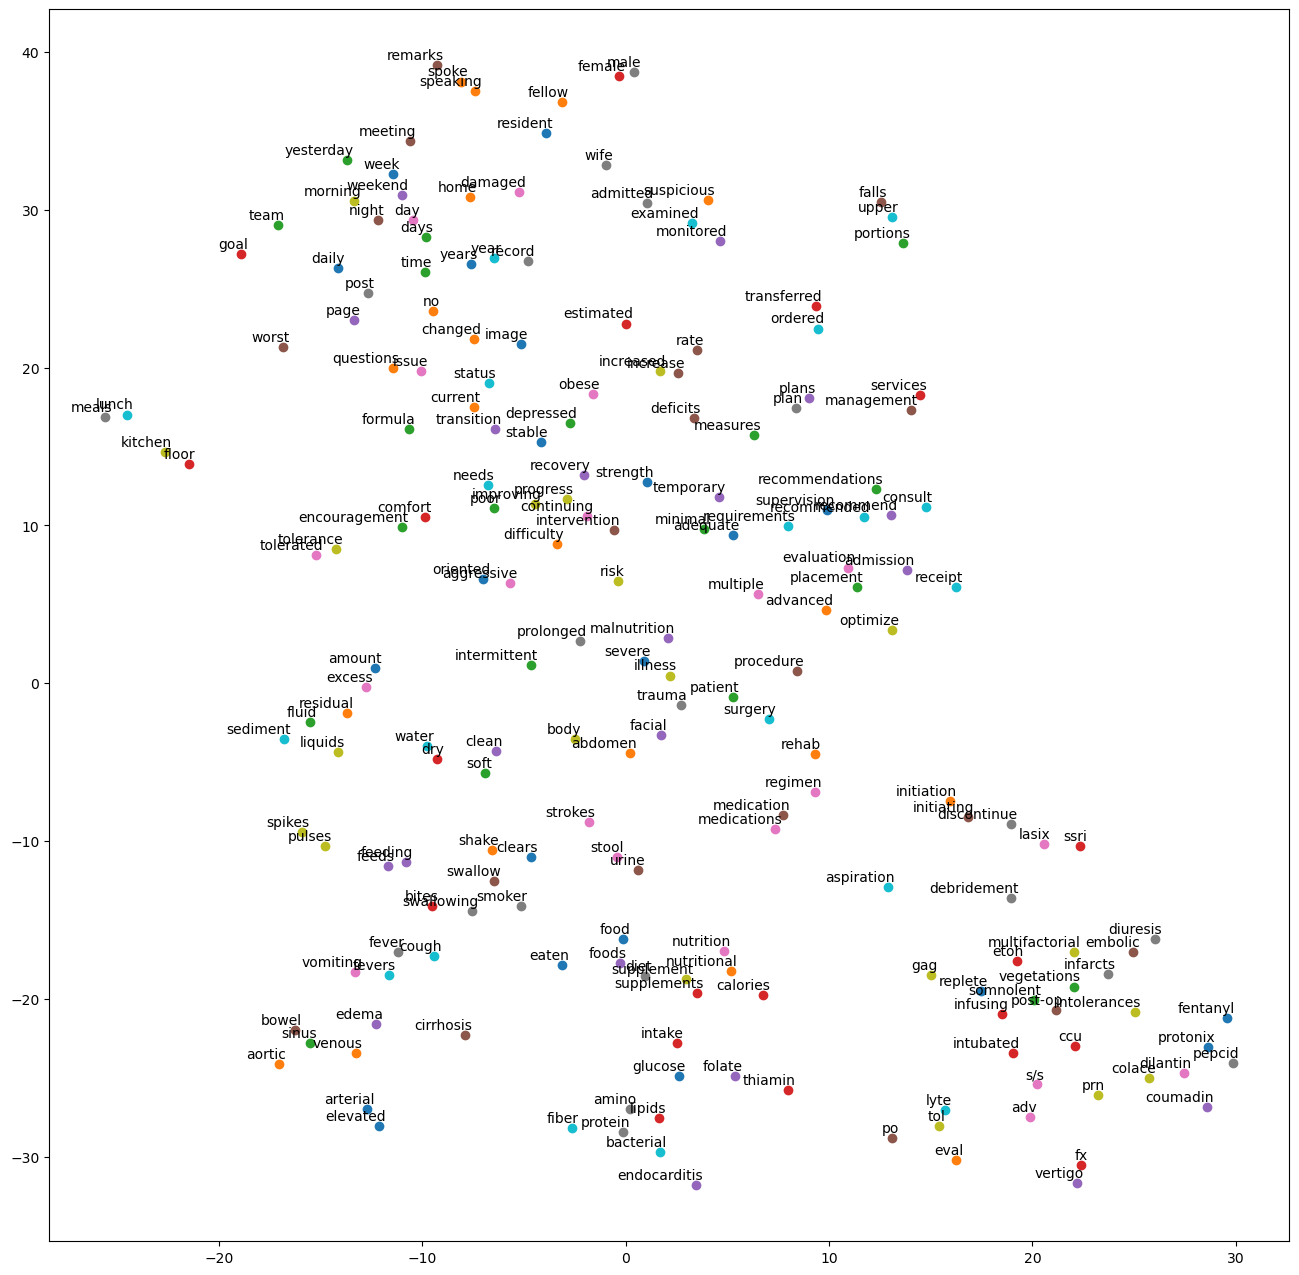

In [57]:
tsne_plot(pretrained_model,new_corpus_in_pretrained_model)

In [ ]:
# import en_core_sci_lg
# nlp = en_core_sci_lg.load()
# doc = []
# for i in range(len(notes)):
#   doc.append(nlp(notes[i]))
#   displacy.render(doc, style="ent", jupyter=True)
#   print("*******************************************************************************************************************************************")

In [ ]:
# import en_ner_craft_md
# nlp = en_ner_craft_md.load()
# doc = []
# for i in range(len(notes)):
#   doc.append(nlp(notes[i]))
#   displacy.render(doc, style="ent", jupyter=True)
#   print("*******************************************************************************************************************************************")

In [ ]:
# import en_ner_jnlpba_md
# nlp = en_ner_jnlpba_md.load()
# doc = []
# for i in range(len(notes)):
#   doc.append(nlp(notes[i]))
#   displacy.render(doc, style="ent", jupyter=True)
#   print("*******************************************************************************************************************************************")

In [ ]:
# import en_ner_bionlp13cg_md
# nlp = en_ner_bionlp13cg_md.load()
# doc = []
# for i in range(len(notes)):
#   doc.append(nlp(notes[i]))
#   displacy.render(doc, style="ent", jupyter=True)
#   print("*******************************************************************************************************************************************")

In [ ]:
# import en_ner_bc5cdr_md
# nlp = en_ner_bc5cdr_md.load()
# doc = []
# for i in range(len(notes)):
#   doc.append(nlp(notes[i]))
#   displacy.render(doc, style="ent", jupyter=True)
#   print("*******************************************************************************************************************************************")